In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


## K Means with number of alerts and product volume

In [45]:
tmp_data['product_volume'].describe()

count    2.192149e+07
mean     9.476367e+01
std      1.114456e+02
min      0.000000e+00
25%      1.300000e+01
50%      4.600000e+01
75%      2.010000e+02
max      8.162000e+03
Name: product_volume, dtype: float64

In [46]:
simpleDataProdVolume = tmp_data.filter(['number_of_alerts', 'product_volume'])

In [47]:
train_data_prod_volume, test_data_prod_volume = train_test_split(simpleDataProdVolume, test_size=0.5)

In [48]:
kmeans_prod_volume = KMeans(n_clusters=4, random_state=0).fit(train_data_prod_volume)
labels_prod_volume = kmeans_prod_volume.labels_

In [55]:
kmeans_prod_volume.fit(np.array(train_data_prod_volume['product_volume'].values).reshape(-1, 1).astype('int'))
y_kmeans_prod_volume = kmeans_prod_volume.predict(np.array(train_data_prod_volume['product_volume'].values).reshape(-1, 1).astype('int'))


[[  19.36891866]
 [ 257.70799043]
 [4992.57615894]
 [  71.13068924]
 [1634.0588697 ]]


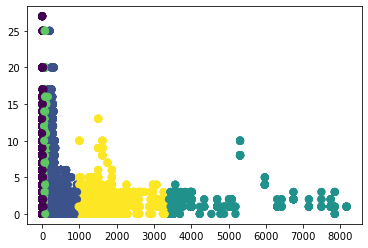

In [58]:
centers_prod_volume = kmeans_prod_volume.cluster_centers_
print(centers_prod_volume)
#plt.scatter(centers_prod_volume, centers_prod_volume, c='black', s=200, alpha=0.5)
plt.scatter(train_data_prod_volume['product_volume'], train_data_prod_volume['number_of_alerts'], c=y_kmeans_prod_volume, s=50, cmap='viridis')



## K Means with number of alerts and min temperature

In [30]:
tmp_data['min_basin_temperature'].describe()

count    2.192149e+07
mean     2.036730e+01
std      2.168995e+00
min      0.000000e+00
25%      2.013100e+01
50%      2.071200e+01
75%      2.102500e+01
max      5.500000e+01
Name: min_basin_temperature, dtype: float64

In [36]:
train_data_min_temp.head(10)

,number_of_alerts,min_basin_temperature
1008323,0,21.410999
10524036,0,20.691000
9959253,0,19.490000
15859304,0,19.162001
6864174,0,20.533001
503794,0,21.542000
725369,0,21.044001
19069383,0,19.740000
13506660,0,20.938000
788196,0,21.268000


In [31]:
simpleDataMinTemp = tmp_data.filter(['number_of_alerts', 'min_basin_temperature'])

In [32]:
train_data_min_temp, test_data_min_temp = train_test_split(simpleDataMinTemp, test_size=0.5)

In [33]:
kmeans_min_temp = KMeans(n_clusters=4, random_state=0).fit(train_data_min_temp)
labels_min_temp = kmeans_min_temp.labels_

In [34]:
kmeans_min_temp.fit(train_data_min_temp['min_basin_temperature'].values.reshape(-1, 1).astype('float'))
y_kmeans_min_temp = kmeans_min_temp.predict(train_data_min_temp['min_basin_temperature'].values.reshape(-1, 1).astype('float'))


[[2.03451818e+01]
 [7.06656155e-04]
 [1.94661130e+01]
 [2.10375387e+01]
 [2.26609994e+01]]


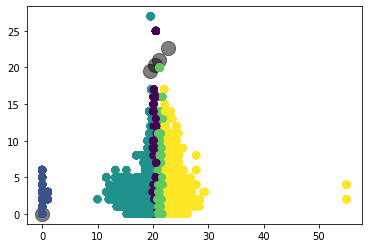

In [35]:
centers_min_temp = kmeans_min_temp.cluster_centers_
print(centers_min_temp)
plt.scatter(centers_min_temp, centers_min_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_min_temp['min_basin_temperature'], train_data_min_temp['number_of_alerts'], c=y_kmeans_min_temp, s=50, cmap='viridis')



## K Means with number of alerts and max temperature

In [24]:
tmp_data['max_basin_temperature'].describe()

count    2.192149e+07
mean     2.257268e+01
std      2.317299e+00
min      0.000000e+00
25%      2.258400e+01
50%      2.276400e+01
75%      2.295400e+01
max      5.500000e+01
Name: max_basin_temperature, dtype: float64

In [27]:
train_data_max_temp.head(10)

,number_of_alerts,max_basin_temperature
7718747,0,22.523001
20094535,0,22.629999
19914117,3,22.476999
19098060,0,22.510000
1997935,0,22.785999
17406528,0,22.662001
6044064,0,22.822001
10260591,3,22.847000
17498771,1,22.568001
9957104,0,22.646000


In [25]:
simpleDataMaxTemp = tmp_data.filter(['number_of_alerts', 'max_basin_temperature'])

In [26]:
train_data_max_temp, test_data_max_temp = train_test_split(simpleDataMaxTemp, test_size=0.5)

In [ ]:
kmeans_max_temp = KMeans(n_clusters=5, random_state=0).fit(train_data_max_temp)
labels_max_temp = kmeans_max_temp.labels_

In [21]:
kmeans_max_temp.fit(train_data_max_temp['max_basin_temperature'].values.reshape(-1, 1).astype('float'))
y_kmeans_max_temp = kmeans_max_temp.predict(train_data_max_temp['max_basin_temperature'].values.reshape(-1, 1).astype('float'))

[[2.26200831e+01]
 [2.73214088e-04]
 [2.30706277e+01]
 [2.08569418e+01]
 [2.41534430e+01]]


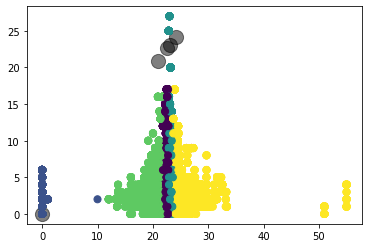

In [22]:
centers_max_temp = kmeans_max_temp.cluster_centers_
print(centers_max_temp)
plt.scatter(centers_max_temp, centers_max_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_max_temp['max_basin_temperature'], train_data_max_temp['number_of_alerts'], c=y_kmeans_max_temp, s=50, cmap='viridis')



## K Means with number of alerts and temp out of range exceptions

In [12]:
tmp_data['number_of_temp_out_of_range_exceptions'].describe()

count    2.192149e+07
mean     5.664715e-03
std      7.505082e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: number_of_temp_out_of_range_exceptions, dtype: float64

In [13]:
simpleDataBadTemp = tmp_data.filter(['number_of_alerts', 'number_of_temp_out_of_range_exceptions'])

In [14]:
train_data_bad_temp, test_data_bad_temp = train_test_split(simpleDataBadTemp, test_size=0.5)

In [16]:
kmeans_bad_temp = KMeans(n_clusters=2, random_state=0).fit(train_data_bad_temp)
labels_bad_temp = kmeans_bad_temp.labels_

In [18]:
kmeans_bad_temp.fit(np.array(train_data_bad_temp['number_of_temp_out_of_range_exceptions'].values).reshape(-1, 1).astype('float'))
y_kmeans_bad_temp = kmeans_bad_temp.predict(np.array(train_data_bad_temp['number_of_temp_out_of_range_exceptions'].values).reshape(-1, 1).astype('float'))


[[0.]
 [1.]]


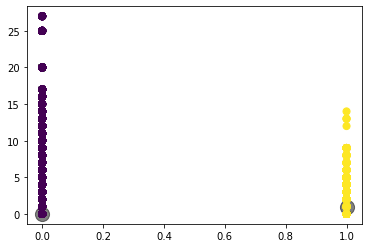

In [20]:
centers_bad_temp = kmeans_bad_temp.cluster_centers_
print(centers_bad_temp)
plt.scatter(centers_bad_temp, centers_bad_temp, c='black', s=200, alpha=0.5)
plt.scatter(train_data_bad_temp['number_of_temp_out_of_range_exceptions'], train_data_bad_temp['number_of_alerts'], c=y_kmeans_bad_temp, s=50, cmap='viridis')



## K Means with number of alerts and run duration

In [43]:
tmp_data['run_duration_minutes'].describe()

count    2.192149e+07
mean     2.154039e+01
std      7.819052e+01
min      0.000000e+00
25%      1.888333e+01
50%      1.993333e+01
75%      2.066667e+01
max      1.018568e+04
Name: run_duration_minutes, dtype: float64

In [37]:
simpleDataRunDuration = tmp_data.filter(['number_of_alerts', 'run_duration_minutes'])

In [38]:
train_data_run_duration, test_data_run_duration = train_test_split(simpleDataRunDuration, test_size=0.5)

In [39]:
train_data_run_duration.head(10)

,number_of_alerts,run_duration_minutes
19201492,2,22.116667
14657400,0,20.133333
6328416,0,22.049999
14466983,0,20.116667
3925555,2,20.250000
12819304,4,21.900000
20791046,0,17.083334
8085199,0,21.133333
16943201,1,20.416666
14451715,1,20.016666


In [40]:
kmeans_run_duration = KMeans(n_clusters=7, random_state=0).fit(train_data_run_duration)

In [41]:
labels_run_duration = kmeans_run_duration.labels_

In [43]:
kmeans_run_duration.fit(train_data_run_duration['run_duration_minutes'].values.reshape(-1, 1).astype('float'))
y_kmeans_run_duration = kmeans_run_duration.predict(train_data_run_duration['run_duration_minutes'].values.reshape(-1, 1).astype('float'))

[[  19.56986167]
 [3276.56570761]
 [1362.60368068]
 [6509.64166882]]


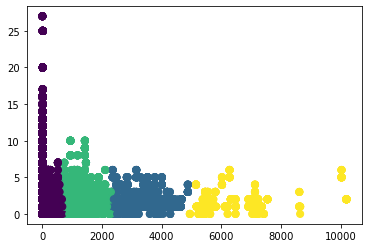

In [44]:
centers_run_duration = kmeans_run_duration.cluster_centers_
print(centers_run_duration)
#plt.scatter(centers2, centers2, c='black', s=200, alpha=0.5)
plt.scatter(train_data_run_duration['run_duration_minutes'], train_data_run_duration['number_of_alerts'], c=y_kmeans_run_duration, s=50, cmap='viridis')



## K Means with number of alerts and procedure duration minutes

In [4]:
tmp_data['procedure_duration_minutes'].describe()

count    2.192149e+07
mean     4.982359e+01
std      1.399619e+02
min      0.000000e+00
25%      2.595000e+01
50%      3.193333e+01
75%      4.758333e+01
max      5.478745e+04
Name: procedure_duration_minutes, dtype: float64

In [5]:
simpleDataProcedureDuration = tmp_data.filter(['number_of_alerts', 'procedure_duration_minutes'])

In [6]:
train_data_procedure_duration, test_data_procedure_duration = train_test_split(simpleDataProcedureDuration, test_size=0.5)

In [21]:
kmeans_procedure_duration = KMeans(n_clusters=3, random_state=0).fit(train_data_procedure_duration)

In [22]:
labels_procedure_duration = kmeans_procedure_duration.labels_

In [23]:
kmeans_procedure_duration.fit(test_data_procedure_duration['procedure_duration_minutes'].values.reshape(-1, 1).astype('float'))
y_kmeans_procedure_duration = kmeans_procedure_duration.predict(train_data_procedure_duration['procedure_duration_minutes'].values.reshape(-1, 1).astype('float'))


[[   47.5693839 ]
 [ 4648.62397104]
 [37107.14208984]]


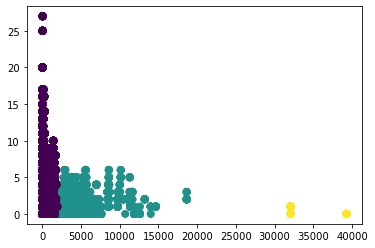

In [24]:
centers_procedure_duration = kmeans_procedure_duration.cluster_centers_
print(centers_procedure_duration)
plt.scatter(train_data_procedure_duration['procedure_duration_minutes'], train_data_procedure_duration['number_of_alerts'], c=y_kmeans_procedure_duration, s=50, cmap='viridis')

